### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
c_df=pd.read_csv('vehicle.csv')
c_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [35]:
c_df.shape

(846, 19)

In [38]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [39]:
c_df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [41]:
#checking Nulls
c_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [60]:
c_df.reset_index(drop=True)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [64]:
c_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [65]:
c_df1=c_df.dropna()

In [66]:
c_df1.shape

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

In [68]:
c_df1.reset_index(drop=True)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
6,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
7,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
8,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202,van
9,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202,car


Since the variable is categorical, you can use value_counts function

In [71]:
c_df1['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

In [72]:
X = c_df1.drop(['class'], axis=1)
Y = c_df1['class']

### Check for any missing values in the data 

In [73]:
#checking Nulls
c_df1.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [147]:
features = c_df1.drop('class', axis=1)
target = c_df1['class']

In [148]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
vehicle_std =  sc.fit_transform(X)

In [149]:

std_scale = StandardScaler()
features_std = pd.DataFrame(std_scale.fit_transform(features, target), columns=features.columns, index=features.index)
features_std.sample(5)

C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
799,-0.201348,-0.944703,-0.383118,0.324503,1.157754,-0.556023,-0.500981,0.257876,-0.606014,-1.165292,-0.301079,-0.504574,-0.967191,-0.053505,-0.071523,0.147109,0.979026,0.577559
348,0.163231,-0.130753,0.124067,-0.330361,0.028249,0.299721,-0.712705,0.642562,-0.606014,0.007467,-0.814777,-0.721516,-0.255388,-1.124255,0.741741,-0.749606,1.629444,1.389003
430,1.256966,1.334359,1.645620,1.098434,-0.097251,0.513657,1.465032,-1.280865,1.338300,1.387184,1.207909,1.459316,1.075376,-0.722724,-1.291420,-0.413338,-0.159204,0.712800
679,-0.565926,-0.619123,-0.383118,0.413803,1.408755,-0.342087,-0.349749,0.129648,-0.606014,-0.820363,-0.236867,-0.373268,-0.657712,0.214183,0.335109,-0.077070,0.328609,-0.098644
818,0.163231,-0.293543,0.884843,0.979368,0.404751,0.299721,0.618134,-0.767951,0.560575,-0.337462,0.918954,0.545879,-0.255388,-0.187348,-0.071523,1.604269,0.166004,0.171837


### K - Means Clustering

### 4. Assign a dummy array called distortion

In [150]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


# k means determine k
distortions = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [151]:
#from sklearn.decomposition import PCA
#X_reduced = PCA(n_components=10).fit_transform(vehicle_std)
#print(X_reduced.shape)

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [153]:

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(features_std)
    kmeanModel.fit(features_std)
    distortions.append(
        sum(np.min(cdist(features_std, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / features_std.shape[0])

In [155]:
distortions

[3.939299196727955,
 2.966824380205441,
 2.642794199692158,
 2.548617081764424,
 2.4285343125776913,
 2.315349379108767,
 2.242937531389373,
 2.1712941084537056,
 2.0994449070468493]

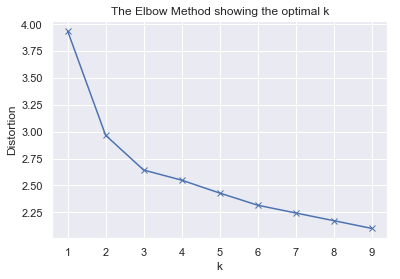

In [154]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [156]:

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_reduced)
    Distortion.append(
        sum(np.min(cdist(X_reduced, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_reduced.shape[0])

### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

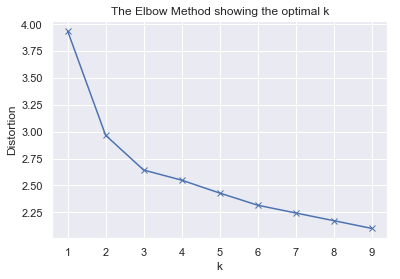

In [157]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Find out the optimal value of K

In [ ]:
#optimal K value is 3

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [158]:
# Build kmeans clustering model using k=3

kmeans = KMeans(n_clusters=3)

In [159]:

kmeans.fit(features_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [160]:
kmeans.cluster_centers_

array([[-0.2339617 , -0.57387481, -0.30776905, -0.03041322,  0.2050726 ,
        -0.11653151, -0.45904181,  0.32506329, -0.48798836, -0.53604446,
        -0.41380935, -0.46366305, -0.60155031, -0.61924057, -0.06177969,
         0.01066762,  0.81278556,  0.69897299],
       [ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.91987072, -0.52009251, -0.89320752, -1.06435572, -0.50042171,
        -0.2190738 , -0.7791213 ,  0.86589322, -0.74535635, -0.484632  ,
        -0.78240328, -0.78341064, -0.38498232,  0.83878747, -0.09524349,
        -0.30171562, -1.05420601, -1.11069466]])

In [161]:
np.unique(kmeans.labels_)

array([0, 1, 2])

In [162]:
np.bincount(kmeans.labels_)

array([313, 260, 240], dtype=int64)

### 7. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [163]:
centroids = pd.DataFrame(kmeans.cluster_centers_,columns=features_std.columns)

In [164]:
centroids

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.233962,-0.573875,-0.307769,-0.030413,0.205073,-0.116532,-0.459042,0.325063,-0.487988,-0.536044,-0.413809,-0.463663,-0.601550,-0.619241,-0.061780,0.010668,0.812786,0.698973
1,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
2,-0.919871,-0.520093,-0.893208,-1.064356,-0.500422,-0.219074,-0.779121,0.865893,-0.745356,-0.484632,-0.782403,-0.783411,-0.384982,0.838787,-0.095243,-0.301716,-1.054206,-1.110695


### Use kmeans.labels_ function to print out the labels of the classes

In [165]:
clusters = kmeans.labels_

In [166]:
clusters

array([0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [167]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [168]:
data = np.concatenate((a, b, c),)

In [169]:
df = pd.DataFrame(data)

In [170]:
df.head()

,0,1
0,9.778243,-0.671218
1,11.335418,-0.218572
2,7.848901,-1.368300
3,11.905026,-0.942610
4,9.894236,4.311724


### 10. Use scatter matrix to print all the 3 distributions

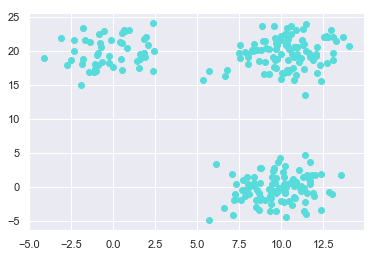

In [171]:
plt.scatter(df[0],df[1])

### 11. Find out the linkage matrix

Use ward as linkage metric and distance as Eucledian

In [173]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# generate the linkage matrix
Z = linkage(df, 'ward', metric='euclidean')

In [174]:
Z

array([[1.20000000e+01, 7.00000000e+01, 7.18426531e-04, 2.00000000e+00],
       [2.12000000e+02, 2.15000000e+02, 3.14333041e-02, 2.00000000e+00],
       [1.10000000e+01, 9.80000000e+01, 5.42421018e-02, 2.00000000e+00],
       [5.30000000e+01, 8.40000000e+01, 7.55575567e-02, 2.00000000e+00],
       [2.01000000e+02, 2.18000000e+02, 8.43972998e-02, 2.00000000e+00],
       [1.97000000e+02, 2.04000000e+02, 8.85918451e-02, 2.00000000e+00],
       [2.30000000e+01, 4.20000000e+01, 9.02011451e-02, 2.00000000e+00],
       [1.58000000e+02, 2.22000000e+02, 9.17665249e-02, 2.00000000e+00],
       [2.02000000e+02, 2.38000000e+02, 9.76670995e-02, 2.00000000e+00],
       [1.04000000e+02, 1.33000000e+02, 1.06148733e-01, 2.00000000e+00],
       [1.86000000e+02, 2.03000000e+02, 1.22575101e-01, 2.00000000e+00],
       [1.72000000e+02, 1.83000000e+02, 1.29642808e-01, 2.00000000e+00],
       [3.00000000e+01, 3.90000000e+01, 1.34740712e-01, 2.00000000e+00],
       [1.75000000e+02, 2.08000000e+02, 1.52976055e

### 12. Plot the dendrogram for the consolidated dataframe

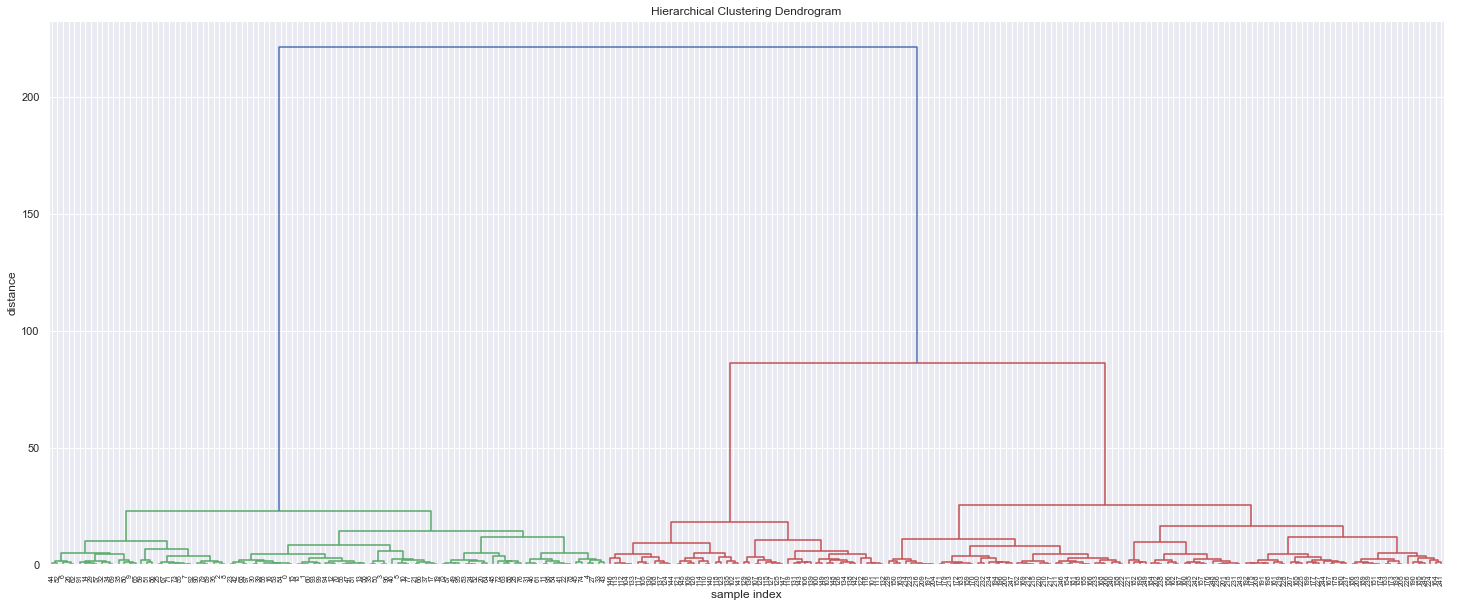

In [177]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=7.,  # font size for the x axis labels
)
plt.show()

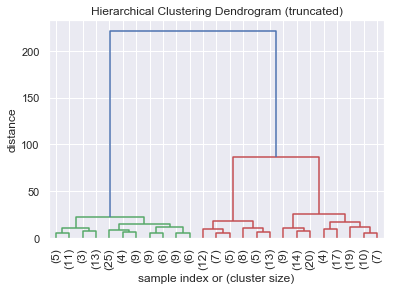

In [178]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

### 13. Recreate the dendrogram for last 12 merged clusters 

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

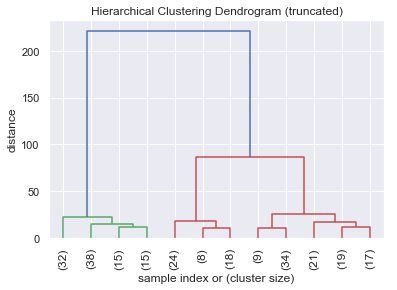

In [179]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
R = dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

In [180]:
R

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [52.5, 52.5, 91.25, 91.25],
  [13.75, 13.75, 71.875, 71.875]],
 'dcoord': [[0.0, 11.683587772194969, 11.683587772194969, 0.0],
  [0.0, 14.416335542849485, 14.416335542849485, 11.683587772194969],
  [0.0, 22.678957199198873, 22.678957199198873, 14.416335542849485],
  [0.0, 10.564081986383748, 10.564081986383748, 0.0],
  [0.0, 18.036155823136248, 18.036155823136248, 10.564081986383748],
  [0.0, 10.822042724809206, 10.822042724809206, 0.0],
  [0.0, 11.83759378378263, 11.83759378378263, 0.0],
  [0.0, 16.622887876456158, 16.622887876456158, 11.83759378378263],
  [10.822042724809206,
   25.28033066211827,
   25.28033066211827,
   16.622887876456158],
  [18.036155823136248,
   86.18786296204617,
   86.18786296204617,
   25.2803

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [ ]:
# The optimal distance lies around 25. 
# With cut off value of 25, we will get 3 clusters

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [181]:
from scipy.cluster.hierarchy import fcluster
max_d = 25
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 3, 4,
       3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 3,
       4, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       3, 4, 3, 3, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4,
       4, 4, 4, 4, 3, 3, 4, 4], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

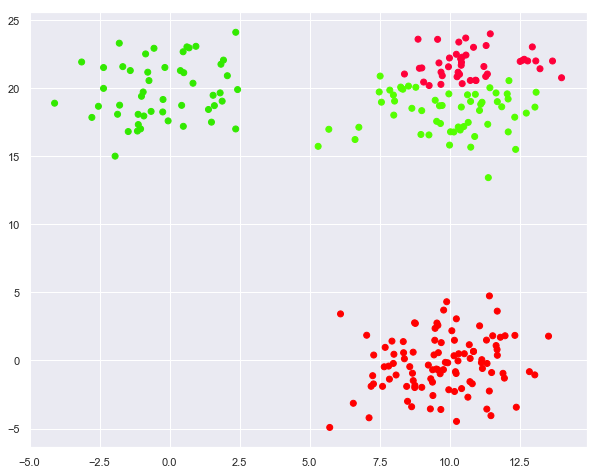

In [182]:
plt.figure(figsize=(10, 8))
plt.scatter(df[0], df[1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()